In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
# from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc

In [3]:
#XGBOOST 算法题

In [4]:
data=pd.read_csv('shared/zoo.csv')
data

,animal_name,species,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,Mammal,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,Fish,4,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,Bird,2,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
96,wallaby,Mammal,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,Bug,6,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [5]:
data['class_type']

0     1
1     1
2     4
3     1
4     1
     ..
95    2
96    1
97    6
98    1
99    7
Name: class_type, Length: 100, dtype: int64

In [6]:
unique_value=data['class_type'].unique()
unique_value

array([1, 4, 2, 7, 6, 5, 3])

In [7]:
data['class_type'] = data['class_type'] - 1
data['class_type']

0     0
1     0
2     3
3     0
4     0
     ..
95    1
96    0
97    5
98    0
99    6
Name: class_type, Length: 100, dtype: int64

In [8]:
unique_value=data['class_type'].unique()
unique_value

array([0, 3, 1, 6, 5, 4, 2])

In [9]:
unique_value=data['species'].unique()
unique_value

array(['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian',
       'Reptile'], dtype=object)

In [10]:
import phik
X = data.phik_matrix()
X

interval columns not set, guessing: ['class_type', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


,animal_name,species,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal_name,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
species,1.0,1.000000,1.000000,0.841040,1.000000,0.869643,1.000000,0.719296,0.606306,0.232616,0.891481,1.000000,0.832226,0.345257,0.786577,0.821710,0.730505,0.000000,0.532050
class_type,1.0,1.000000,1.000000,0.841040,1.000000,0.869643,1.000000,0.719296,0.606306,0.232616,0.891481,1.000000,0.832226,0.345257,0.786577,0.821710,0.730505,0.000000,0.532050
hair,1.0,0.841040,0.841040,1.000000,0.567231,0.947727,0.974364,0.201253,0.653468,0.166460,0.659161,0.215998,0.604301,0.000000,0.367742,0.820677,0.000000,0.224373,0.613969
feathers,1.0,1.000000,1.000000,0.567231,1.000000,0.555610,0.544008,0.816739,0.000000,0.000000,0.784118,0.258981,0.301774,0.000000,0.243724,0.952872,0.366749,0.000000,0.000000
eggs,1.0,0.869643,0.869643,0.947727,0.555610,1.000000,0.991504,0.497584,0.524647,0.000000,0.820889,0.461071,0.525024,0.000000,0.159361,0.779120,0.277324,0.112559,0.687680
milk,1.0,1.000000,1.000000,0.974364,0.544008,0.991504,1.000000,0.483328,0.504948,0.000000,0.807805,0.524998,0.580478,0.284570,0.139634,0.838902,0.257357,0.133666,0.755192
airborne,1.0,0.719296,0.719296,0.201253,0.816739,0.497584,0.483328,1.000000,0.148720,0.365984,0.766027,0.000000,0.358095,0.000000,0.297192,0.895260,0.000000,0.000000,0.457106
aquatic,1.0,0.606306,0.606306,0.653468,0.000000,0.524647,0.504948,0.148720,1.000000,0.505158,0.000000,0.000000,0.814074,0.000000,0.780236,0.656830,0.000000,0.264753,0.000000
predator,1.0,0.232616,0.232616,0.166460,0.000000,0.000000,0.000000,0.365984,0.505158,1.000000,0.000000,0.000000,0.328541,0.000000,0.195550,0.322903,0.000000,0.411026,0.092897


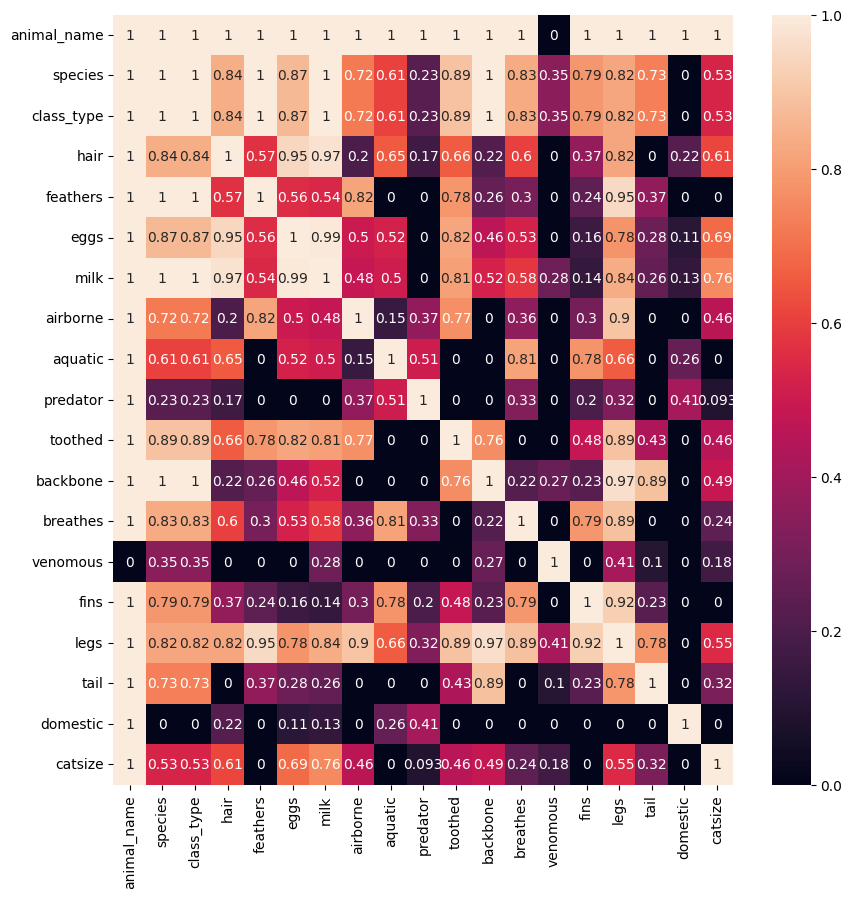

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(X, annot=True);

In [12]:
# Test train split
X = data.loc[:, data.columns != 'class_type']
y = data['class_type']
feature_names = data.loc[:, data.columns != 'class_type'].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [13]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:animal_name: object, species: object

In [1]:
data.info()

NameError: name 'data' is not defined

In [14]:
del data['animal_name']
del data['species']

In [15]:
data

,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
96,0,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,5,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [16]:
# Test train split
X = data.loc[:,data.columns != 'class_type']
y = data['class_type']
feature_names = data.loc[:, data.columns != 'class_type'].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [17]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [18]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)
pred

array([2, 0, 1, 6, 0, 0, 0, 3, 0, 0, 3, 5, 1, 2, 5, 0, 0, 0, 1, 0])

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/mggy8413/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/mggy8413/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.79      0.86      0.81        20
weighted avg       0.93      0.95      0.93        20



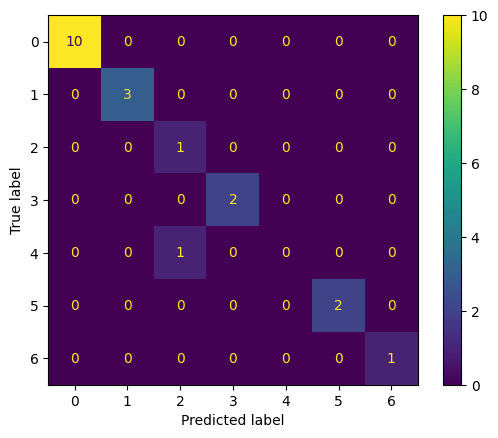

In [19]:
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

In [20]:
model_xgb.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [21]:
y_test

80    2
84    0
33    1
81    6
93    0
17    0
36    0
82    3
69    0
65    0
92    3
39    5
56    1
52    4
51    5
32    0
31    0
44    0
78    1
10    0
Name: class_type, dtype: int64

In [22]:
pred_prob = model_xgb.predict_proba(X_test).round(3)
pred_prob

array([[0.054, 0.05 , 0.707, 0.043, 0.038, 0.038, 0.07 ],
       [0.988, 0.001, 0.004, 0.001, 0.001, 0.002, 0.002],
       [0.004, 0.977, 0.002, 0.003, 0.005, 0.003, 0.005],
       [0.042, 0.038, 0.07 , 0.033, 0.05 , 0.073, 0.693],
       [0.988, 0.001, 0.004, 0.001, 0.001, 0.002, 0.002],
       [0.988, 0.001, 0.005, 0.001, 0.001, 0.002, 0.001],
       [0.988, 0.001, 0.005, 0.001, 0.001, 0.002, 0.001],
       [0.006, 0.005, 0.011, 0.955, 0.006, 0.008, 0.01 ],
       [0.989, 0.001, 0.005, 0.001, 0.001, 0.001, 0.001],
       [0.988, 0.001, 0.005, 0.001, 0.001, 0.002, 0.001],
       [0.009, 0.008, 0.016, 0.937, 0.009, 0.006, 0.015],
       [0.006, 0.003, 0.007, 0.002, 0.003, 0.963, 0.016],
       [0.004, 0.971, 0.006, 0.003, 0.003, 0.006, 0.005],
       [0.078, 0.071, 0.552, 0.061, 0.131, 0.055, 0.052],
       [0.006, 0.003, 0.002, 0.002, 0.003, 0.967, 0.016],
       [0.986, 0.001, 0.002, 0.001, 0.005, 0.003, 0.002],
       [0.988, 0.001, 0.005, 0.001, 0.001, 0.002, 0.001],
       [0.989,

In [23]:
#用MODEL进行预测

In [24]:
data_dict = {
    "hair": 0,
    "feathers": 1,
    "eggs": 1,
    "milk": 0,
    "airborne": 1,
    "aquatic": 0,
    "predator": 0,
    "toothed": 0,
    "backbone": 1,
    "breathes": 1,
    "venomous": 0,
    "fins": 0,
    "legs": 2,
    "tail": 1,
    "domestic": 0,
    "catsize": 0
}
data_dict

{'hair': 0,
 'feathers': 1,
 'eggs': 1,
 'milk': 0,
 'airborne': 1,
 'aquatic': 0,
 'predator': 0,
 'toothed': 0,
 'backbone': 1,
 'breathes': 1,
 'venomous': 0,
 'fins': 0,
 'legs': 2,
 'tail': 1,
 'domestic': 0,
 'catsize': 0}

In [25]:
data_array = np.array(list(data_dict.values()))

print(data_array)

[0 1 1 0 1 0 0 0 1 1 0 0 2 1 0 0]


In [28]:
type(data_array)

numpy.ndarray

In [27]:
model_xgb.predict([data_array])

ValueError: training data did not have the following fields: hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize

In [2]:
pred = model_xgb.predict([[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0]])
pred

NameError: name 'model_xgb' is not defined